In [1]:
import segmentation_models as sm
import cv2
import numpy as np
from matplotlib import pyplot as plt

Segmentation Models: using `keras` framework.


In [2]:
#create model
model = sm.Unet('efficientnetb3', classes=1, activation="sigmoid")

1/1 [==============================] - 0s 17ms/step


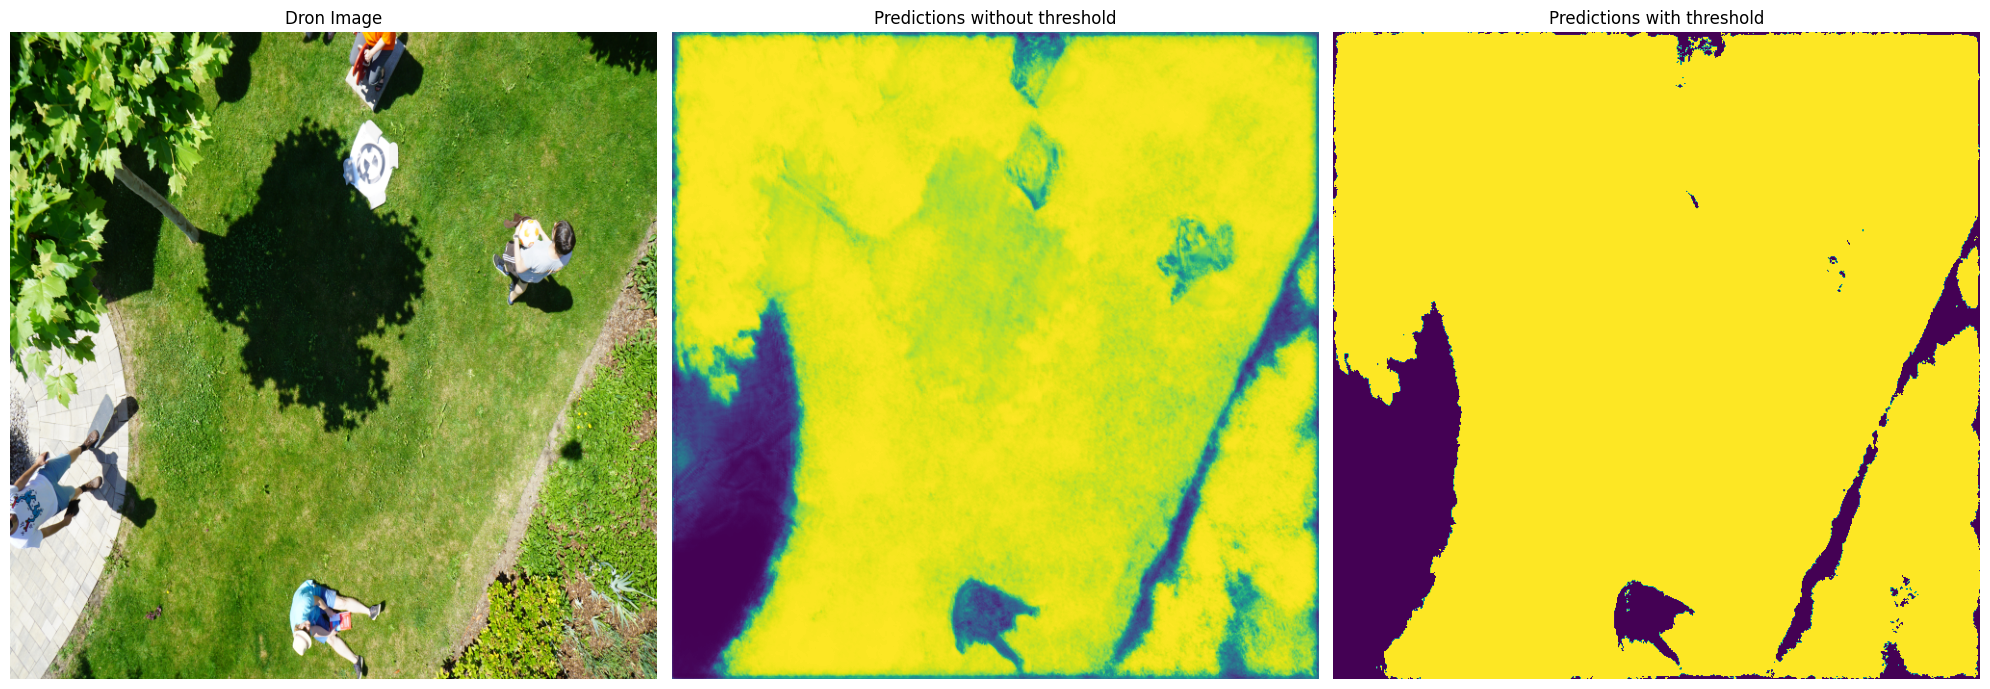

True

In [5]:
model.load_weights('best_model.weights.h5') 
image = cv2.imread("C:\\Utils\\GreenAreaDetectionWithDrones\\image.jpg")
image_resized = cv2.resize(image, (672, 672), interpolation=cv2.INTER_AREA)
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
image_input = np.expand_dims(image_rgb, axis=0)

predictions = model.predict(image_input)
predictions = predictions[0]  

threshold = 0.50
filtered_predictions = (predictions > threshold).astype(np.uint8)


fig, axs = plt.subplots(1, 3, figsize=(20, 7))

axs[0].imshow(image_rgb)
axs[0].set_title('Dron Image')
axs[0].axis('off')

axs[1].imshow(predictions)
axs[1].set_title('Predictions without threshold')
axs[1].axis('off')

axs[2].imshow(filtered_predictions.squeeze())
axs[2].set_title('Predictions with threshold')
axs[2].axis('off')

plt.tight_layout()
plt.show()

image_to_save = (predictions * 255).astype(np.uint8)
cv2.imwrite('mask_image.jpg',image_to_save)
